## IT Challenges- Artificial Intelligence
### Imputation & Data Analysis Challenge

1. Importing the necessary libraries and data

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

climate = pd.read_csv("DailyAlgiersClimate.csv")

2. Data Visualisation and Analysis before imputation

In [91]:
climate.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,NaN,NaN,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,NaN,71.333333,1.233333,1017.166667
4,2013-01-05,NaN,86.833333,3.700000,1016.500000


In [92]:
climate.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1023.000000,1023.000000,1023.000000,1462.000000
mean,25.505244,61.057553,6.763707,1011.104548
std,7.311055,16.907562,4.517117,180.231668
min,7.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.937500,3.466071,1001.580357
50%,27.960000,62.833333,6.250000,1008.563492
75%,31.250000,72.598214,9.159375,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [93]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1023 non-null   float64
 2   humidity      1023 non-null   float64
 3   wind_speed    1023 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


We notice that there are missing values in *meantemp*, *humidity* and *windspeed*

In [94]:
climate.isnull().sum()

date              0
meantemp        439
humidity        439
wind_speed      439
meanpressure      0
dtype: int64

<Axes: title={'center': "Algiers' Climate through the years"}, xlabel='date'>

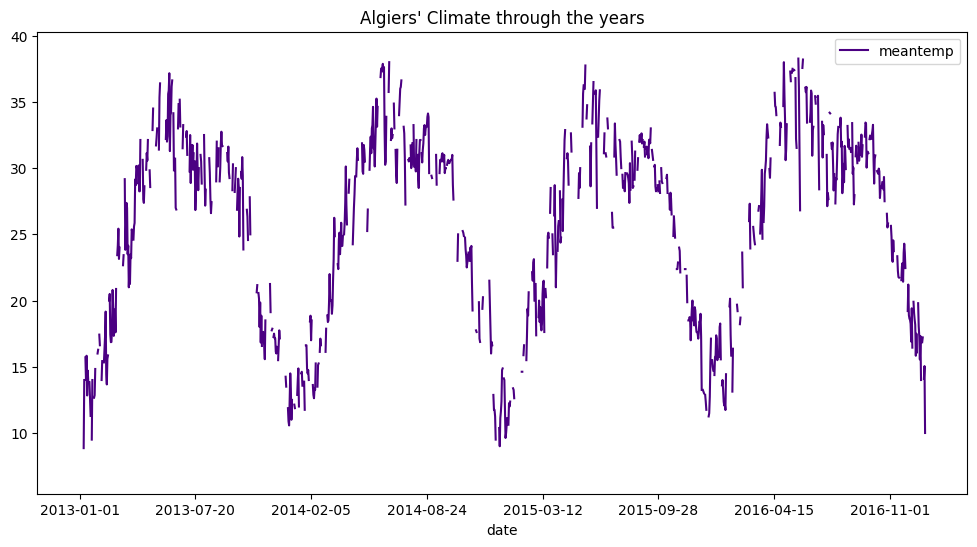

In [95]:
#Visual visualization of the data
climate.plot(title="Algiers' Climate through the years",x='date', y='meantemp', color='indigo',figsize=(12, 6))


In [96]:
#classifying by years and months to get a better understanding of the data
climate['date'] = pd.to_datetime(climate['date'])
climate['year'] = climate['date'].dt.year
climate['month'] = climate['date'].dt.month

In [97]:
climate.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,NaN,NaN,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,NaN,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,NaN,86.833333,3.700000,1016.500000,2013,1


Exploiting date by sorting the data by year and month for better visualization

<Axes: title={'center': "Algiers' Climate through the years"}, xlabel='year'>

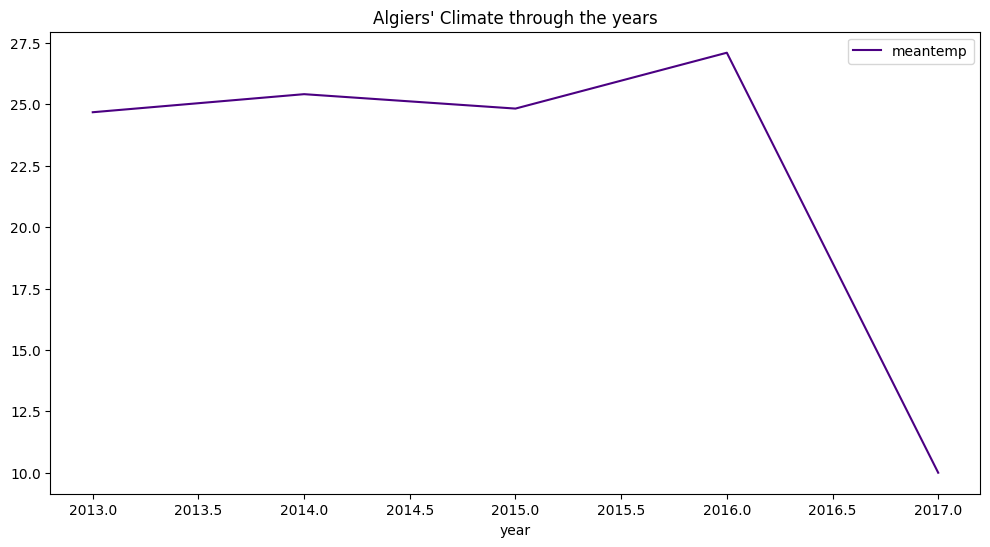

In [98]:
climate.groupby(['year']).mean()
climate.groupby(['year']).mean().plot(title="Algiers' Climate through the years", y='meantemp', color='indigo',figsize=(12, 6))

<Axes: title={'center': "Algiers' Climate through the months"}, xlabel='month'>

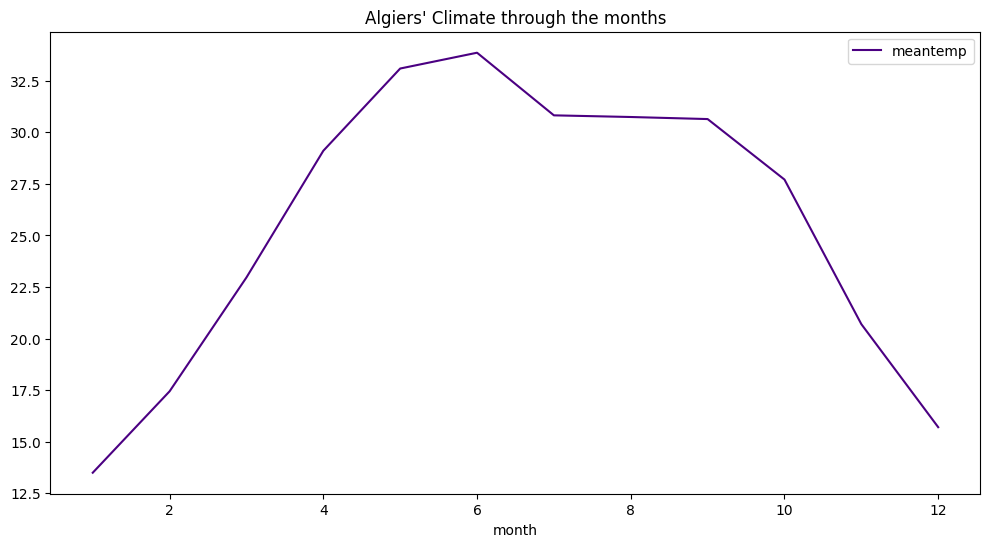

In [99]:
climate.groupby(['month']).mean()
climate.groupby(['month']).mean().plot(title="Algiers' Climate through the months", y='meantemp', color='indigo',figsize=(12, 6))

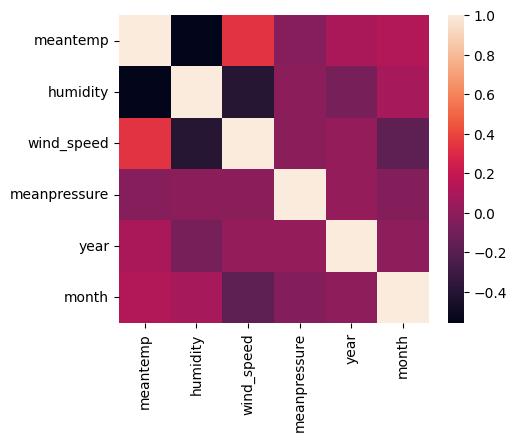

In [100]:
numeric_data = climate.drop(['date'], axis=1)

plt.figure(figsize=(5,4))
sns.heatmap(numeric_data.corr())
plt.show()

3. Imputation of the missing values for a better analysis

In [101]:
#Interpolation of the missing values
climate['meantemp'] = climate['meantemp'].interpolate()
climate['humidity'] = climate['humidity'].interpolate()
climate['wind_speed'] = climate['wind_speed'].interpolate()


In [102]:
climate.isnull().sum()


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
year            0
month           0
dtype: int64

4. Visualization and Analysis of the data after imputation

In [103]:
climate.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,8.583333,85.750000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,7.111111,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,7.055556,86.833333,3.700000,1016.500000,2013,1


In [104]:
climate.describe()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
count,1462,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2015-01-01 12:00:00,25.533098,60.919173,6.782298,1011.104548,2014.502736,6.519152
min,2013-01-01 00:00:00,7.000000,13.428571,0.000000,-3.041667,2013.000000,1.000000
25%,2014-01-01 06:00:00,19.000000,51.161706,3.700000,1001.580357,2014.000000,4.000000
50%,2015-01-01 12:00:00,27.810714,62.714286,6.271875,1008.563492,2015.000000,7.000000
75%,2016-01-01 18:00:00,31.375000,72.285119,9.186905,1014.944901,2016.000000,10.000000
max,2017-01-01 00:00:00,38.714286,100.000000,42.220000,7679.333333,2017.000000,12.000000
std,NaN,7.325446,16.560397,4.239242,180.231668,1.120248,3.451727


In [105]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   year          1462 non-null   int32         
 6   month         1462 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(2)
memory usage: 68.7 KB


<Axes: title={'center': "Algiers' Climate through the years"}, xlabel='date'>

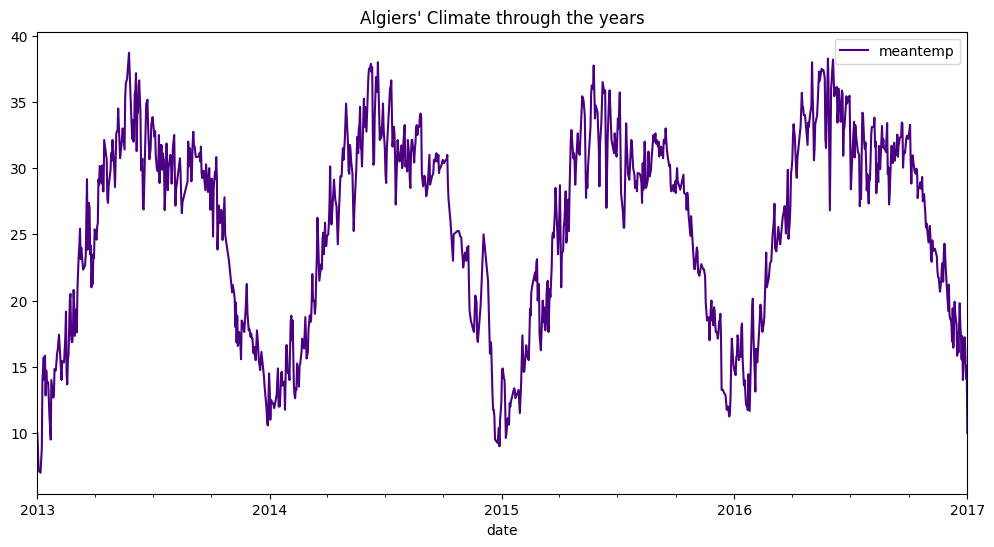

In [106]:
climate.plot(title="Algiers' Climate through the years",x='date', y='meantemp', color='indigo',figsize=(12, 6))

We can notice that the plot is now connected, unlike earlier where it showcased many gaps due to the missing data

<Axes: title={'center': "Algiers' Climate through the years"}, xlabel='year'>

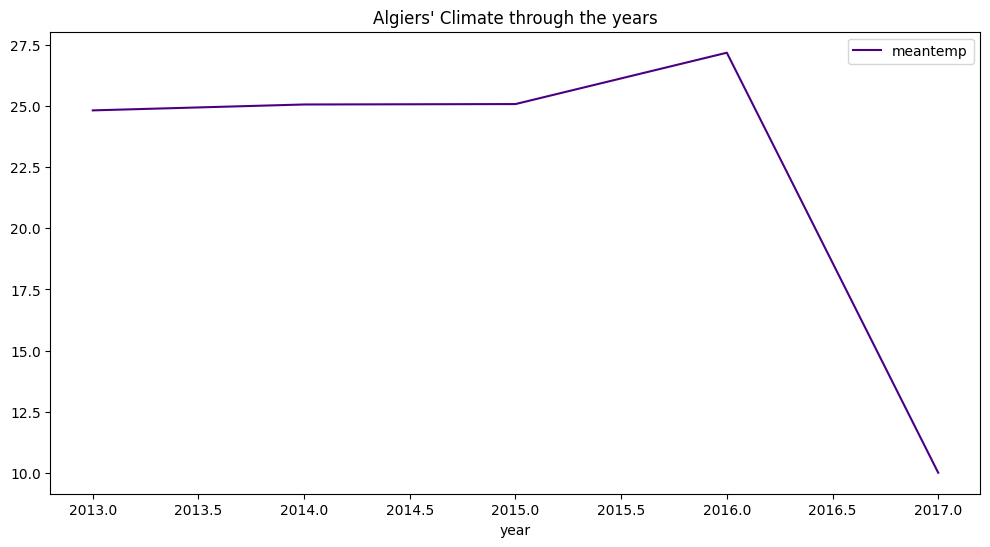

In [107]:
climate.groupby(['year']).mean().plot(title="Algiers' Climate through the years", y='meantemp', color='indigo',figsize=(12, 6))

<Axes: title={'center': "Algiers' Climate through the months"}, xlabel='month'>

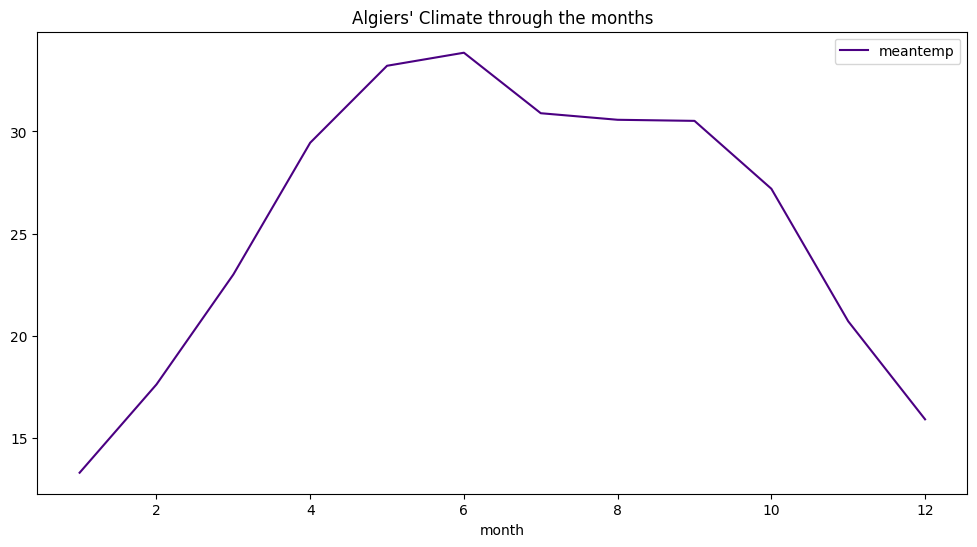

In [108]:
climate.groupby(['month']).mean().plot(title="Algiers' Climate through the months", y='meantemp', color='indigo',figsize=(12, 6))

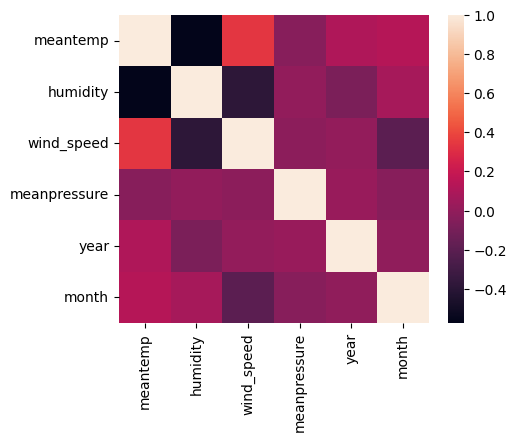

In [109]:
numeric_data = climate.drop(['date'], axis=1)

plt.figure(figsize=(5,4))
sns.heatmap(numeric_data.corr())
plt.show()

5. Final analysis and trend detection in the data

In [110]:
print("Basic Statistics by Year:")
yearly_stats = climate.groupby('year').agg({
    'meantemp': ['mean', 'min', 'max', 'std'],
    'humidity': ['mean', 'min', 'max', 'std'],
    'wind_speed': ['mean', 'min', 'max', 'std']
}).round(2)
print(yearly_stats)

Basic Statistics by Year:
     meantemp                     humidity                        wind_speed  \
         mean    min    max   std     mean     min     max    std       mean   
year                                                                           
2013    24.83   7.00  38.71  7.39    63.24   19.00   94.00  18.01       6.84   
2014    25.07   9.00  38.00  7.53    60.05   20.88   96.86  15.96       6.79   
2015    25.09   9.62  37.75  7.22    61.50   13.43   98.00  15.57       6.44   
2016    27.19  11.67  38.27  6.89    58.79   18.47   93.88  16.23       7.08   
2017    10.00  10.00  10.00   NaN   100.00  100.00  100.00    NaN       0.00   

                        
      min    max   std  
year                    
2013  0.0  42.22  4.51  
2014  0.0  30.69  4.50  
2015  0.0  27.78  4.18  
2016  0.0  22.10  3.70  
2017  0.0   0.00   NaN  


We notice that the mean temperatures keep increasing throughout the years, where it went from an average 24° back in 2013 to 27° in 2017. And this highlights the effects ** global warming ** has on the climate.
And while the temperatures and wind speed increased in the are, the humidity noticeably decreased

In [112]:
savamonthly_patterns = climate.groupby('month').agg({
    'meantemp': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean'
}).round(2)
print("\nMonthly Averages:")
print(savamonthly_patterns)


Monthly Averages:
       meantemp  humidity  wind_speed
month                                
1         13.29     79.29        4.76
2         17.61     67.68        7.25
3         22.99     60.87        7.77
4         29.45     39.34        8.78
5         33.22     35.64        9.02
6         33.85     50.85        9.51
7         30.89     70.81        7.32
8         30.57     70.68        6.53
9         30.52     60.41        7.64
10        27.19     61.32        5.09
11        20.70     60.84        3.49
12        15.90     72.70        4.36
